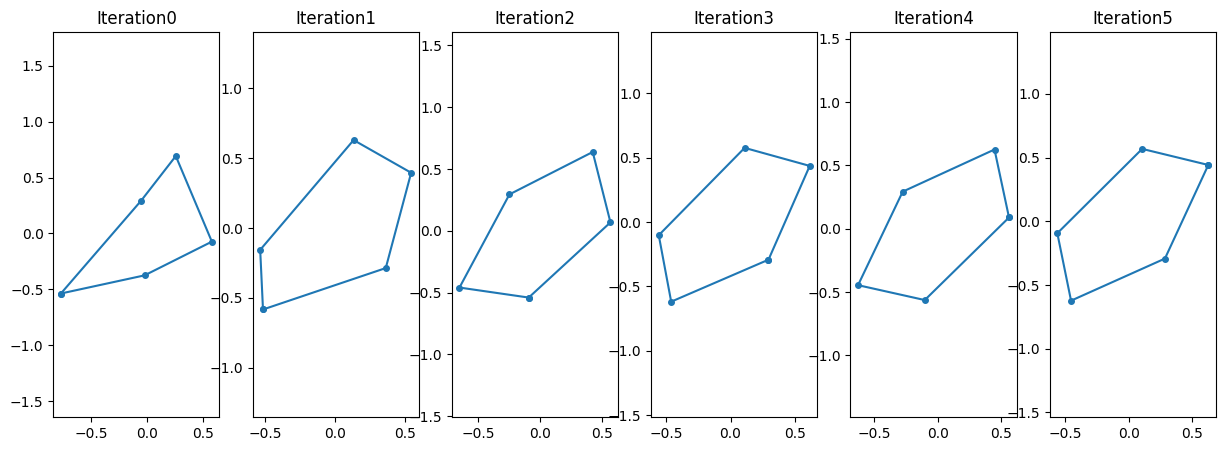

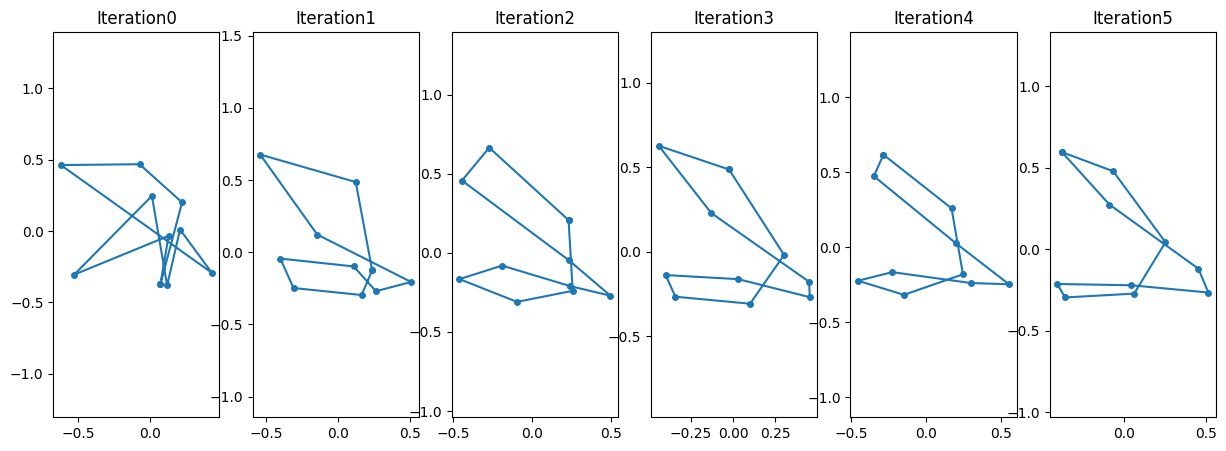

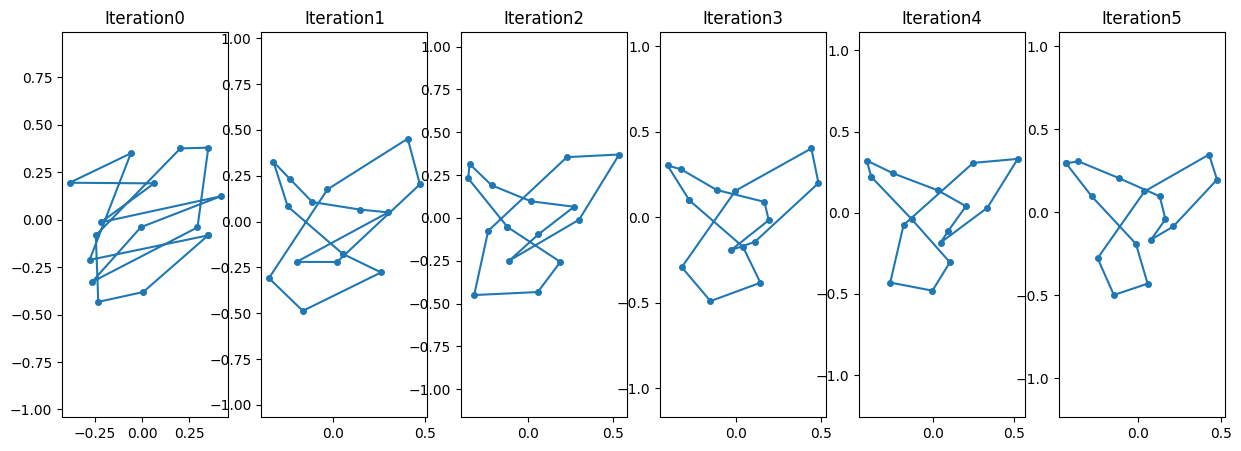

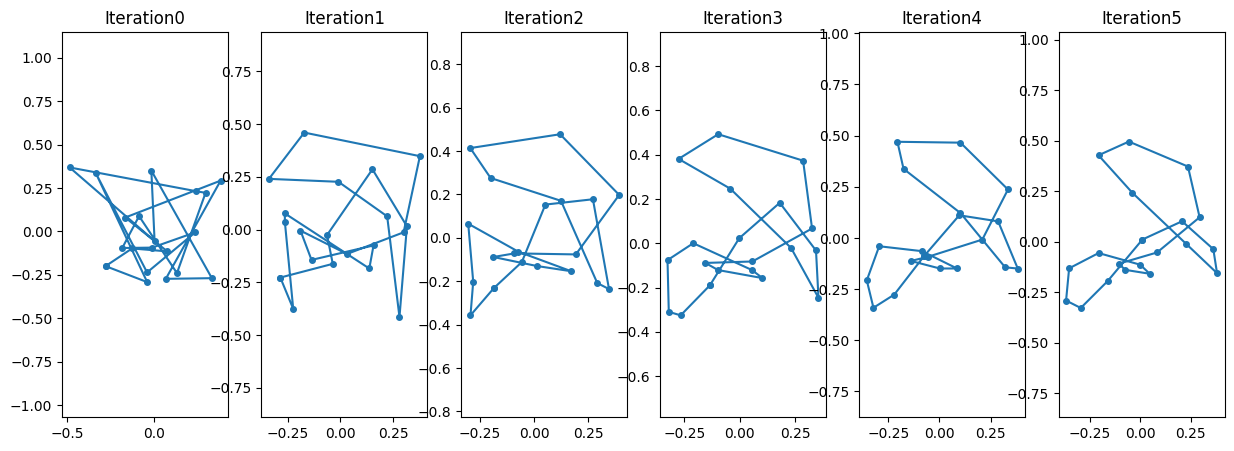

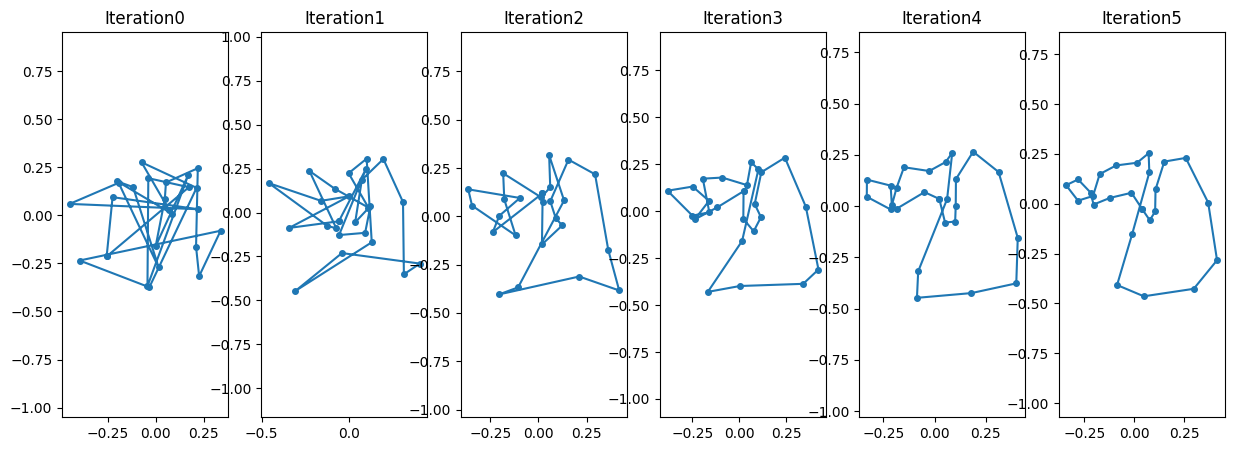

The matrix A: [[0.5 0.5 0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.5 0.5 0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.5 0.5 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.5 0.5 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.5 0.5 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.5 0.5 0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.5 0.5]
 [0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.5]]
The determinant of A: 0.0
A is singular
The first singular value: 1.0
The second singular value: 0.951056516295154
The first singular vector:
 [-0.31622777 -0.31622777 -0.31622777 -0.31622777 -0.31622777 -0.31622777
 -0.31622777 -0.31622777 -0.31622777 -0.31622777]
The second singular vector:
 [-0.1381966 -0.3618034 -0.4472136 -0.3618034 -0.1381966  0.1381966
  0.3618034  0.4472136  0.3618034  0.1381966]


In [11]:
import numpy as np
import matplotlib.pyplot as plt

def gen_randomcycle(n):
  x=np.random.rand(n)*(2-1)
  y=np.random.rand(n)*(2-1)
  return np.column_stack((x,y))

def calculate_midpoints(points):
  midpoints=(points+np.roll(points,-1,axis=0))/2
  return midpoints

def normalize(points):
  points=points-np.mean(points,axis=0)
  return points/np.linalg.norm(points,axis=0)

def construct_A(n):
  A=np.zeros((n,n))
  for i in range(n):
    A[i,i]=0.5
    A[i,(i+1)%n]=0.5
  return A

def graph_smoothing(n, steps=5):
  fig, axes= plt.subplots(1, steps+1, figsize=(15,5))

  points = gen_randomcycle(n)
  points = normalize(points)

  for i in range(steps+1):
    closed_points=np.vstack([points, points[0]])
    axes[i].plot(closed_points[:,0],closed_points[:,1],'o-',markersize=4)
    axes[i].set_title(f'Iteration{i}')
    axes[i].axis("equal")

    points=calculate_midpoints(points)
    points=normalize(points)

  plt.show()

for n in [5,10,15,20,25]:
  graph_smoothing(n, steps=5)

n=10
A=construct_A(n)
print("The matrix A:",A)

det_A=np.linalg.det(A)
print("The determinant of A:", det_A)

if np.abs(det_A) < 1e-10:
  print("A is singular")
else:
  print("A is not singular")

if np.abs(det_A)>1e-10:
  A_inv=np.linalg.inv(A)
  x_original=np.random.rand(n)
  for i in range(5):
    x_original=A_inv.dot(x_original)
    print(x_original)
    x_original=x_original/np.linalg.norm(x_original)

U,S,Vt=np.linalg.svd(A)
print('The first singular value:', S[0])
print('The second singular value:', S[1])

print("The first singular vector:\n", U[:,0])
print("The second singular vector:\n", U[:,1])